# Clustering

Clustering is the third type of Core Learning Algorithm in Machine Learning.

It is an unsupervised learning technique

It is a ML technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.


Clustering uses the KMeans method to perform clustering algorithm.

The Basic algorithm for K-Means is as follows:
- Step 1: Randomly pick K points to place K centroids.
- Step 2: Assign all of the data points to the centroids by distance. The closest centroid to a point is the one assigned to.
- Step 3: Average all of the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position

- Step 4: Reassign every point once again to the closest centroid.
- Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.

---

# Coding example of KMeans Clustering

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

## Creating dummy Data

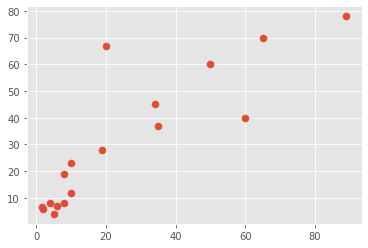

In [5]:
%matplotlib inline
X = np.array([[2,6],[4,8],[5,4],[8,8],[6,7],[19,28],[1.67,6.67],[10,12],[8,19],[10,23],[35,37],[89,78],[20,67],[34,45],[60,40],[50,60],[65,70]])
plt.scatter(X[:,0],X[:,1],s=50)
plt.show()

## Defining KMeans Class

In [18]:
class K_Means:
    def __init__(self,k=3,tol=0.001,max_iter = 500):
        self.k = k
        self.tol = tol #tolerance value which will allow us to say we're optimzed if the centroid is not moving more than the tolerance value
        self.max_iter = max_iter #Maximum number of iterations we will be running the algorithm for
    
    def fit(self,data):
        np.random.shuffle(data)
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
            
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
    
    def predict(self,data):
        disatnces = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = disatnces.index(min(disatnces))
        return classification

## Fitting the model

234.468984962406
23.026315789473685
15.204843227613631
48.14814814814815


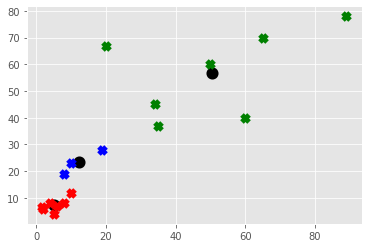

In [19]:
if __name__=="__main__":
    clf = K_Means()
    clf.fit(X)
    colors = ['r','g','b','c','k','o','y']
    for centroid in clf.centroids:
        plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],marker="o",color="k",s=50,linewidths=5)

    for classification in clf.classifications:
        color = colors[classification]
        for featureset in clf.classifications[classification]:
            plt.scatter(featureset[0],featureset[1],marker='x',color=color,s=50,linewidths=5)
    
    plt.show()


## Predicitions

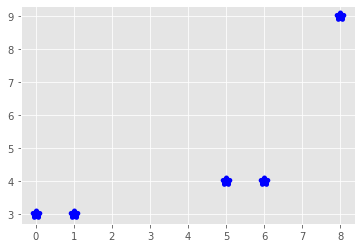

In [20]:
unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0],unknown[1],marker="*",color = color[classification],s=50,linewidths=5)

plt.show()